In [2]:
import  openpyxl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
#from pandas.tools.plotting import scatter_matrix
credit_record = 'https://drive.google.com/uc?export=download&id=1LYuAqhzP0qWtwwSFQWbg30nliCUW_8vu'
application_record = "https://drive.google.com/uc?export=download&id=1WZjnqY3hJq21wST7liY_bPyToaVnKTaO"
df_application_record = pd.read_csv(application_record)
df_credit_record = pd.read_csv(credit_record)
df_application_record

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


# 1 Импорт данных
### Описание полей
CODE-GENDER - возраст
FLAG_OWN_CAR - имеется ли машина
FLAG_OWN_REALITY - имеется ли недвижимость
CNT_CHILDREN - количество детей
ANI_INCOME_TOTAL - годовой доход
NAME_INCOME_TYPE - категория дохода
NAME_EDUCATION_TYPE - уровень образования
NAME_FAMILY_STATUS - семейное положение
NAME_HOUSING_TYPE - образ жизни


In [3]:
df_application_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [4]:
df_application_record.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [5]:
# сколько различных данных существует в колонках "CNT_CHILDREN" и "NAME_INCOME_TYPE"
#print(df_application_record.CNT_CHILDREN.unique())
print(df_application_record.NAME_INCOME_TYPE.unique())
print(df_application_record.NAME_EDUCATION_TYPE.unique())

['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']


In [6]:
# посмотреть статистики
print(df_application_record.describe())
# посмотреть статистики по категориальным различным переменным
print(df_application_record.describe(include=object))

                 ID   CNT_CHILDREN  AMT_INCOME_TOTAL     DAYS_BIRTH   
count  4.385570e+05  438557.000000      4.385570e+05  438557.000000  \
mean   6.022176e+06       0.427390      1.875243e+05  -15997.904649   
std    5.716370e+05       0.724882      1.100869e+05    4185.030007   
min    5.008804e+06       0.000000      2.610000e+04  -25201.000000   
25%    5.609375e+06       0.000000      1.215000e+05  -19483.000000   
50%    6.047745e+06       0.000000      1.607805e+05  -15630.000000   
75%    6.456971e+06       1.000000      2.250000e+05  -12514.000000   
max    7.999952e+06      19.000000      6.750000e+06   -7489.000000   

       DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE     FLAG_PHONE   
count  438557.000000    438557.0    438557.000000  438557.000000  \
mean    60563.675328         1.0         0.206133       0.287771   
std    138767.799647         0.0         0.404527       0.452724   
min    -17531.000000         1.0         0.000000       0.000000   
25%     -3103.000000

# График подсчета категориальных признаков: df_application_record


In [7]:
def countplot_applicants(features):
    for feature in features:
        plt.figure(figsize=(9, 9))
        ax=sns.countplot(x=df_application_record[feature], hue='CODE_GENDER' , data=df_application_record)
        plt.legend(loc='best')
        total = len(df_application_record[feature])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/total)
            x = p.get_x()+p.get_width()/2
            y = p.get_height()
            ax.annotate(percentage, (x,y), ha='center')
    plt.show()

In [8]:
def countplot_applicants2(features):
    for feature in features:
        plt.figure(figsize=(9, 9))
        ax=sns.countplot(y=df_application_record[feature], hue='CODE_GENDER', data=df_application_record)
        plt.legend(loc='best')
        total = len(df_application_record[feature])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
    plt.show()

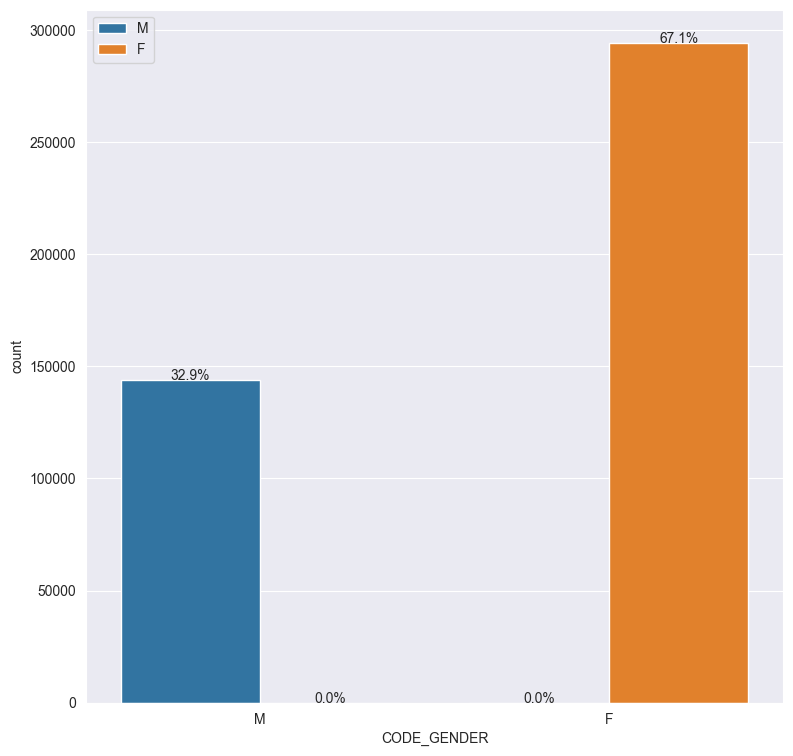

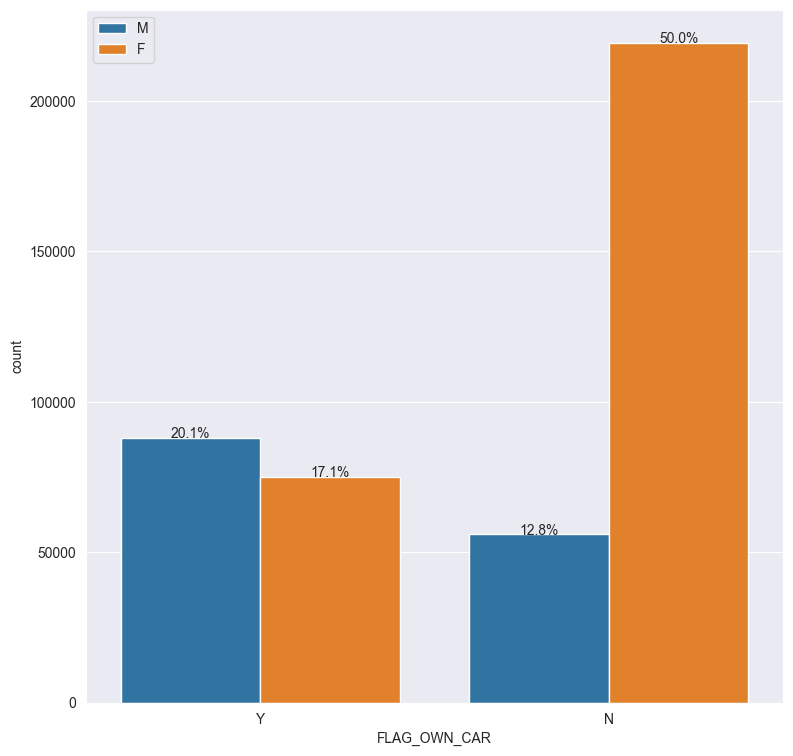

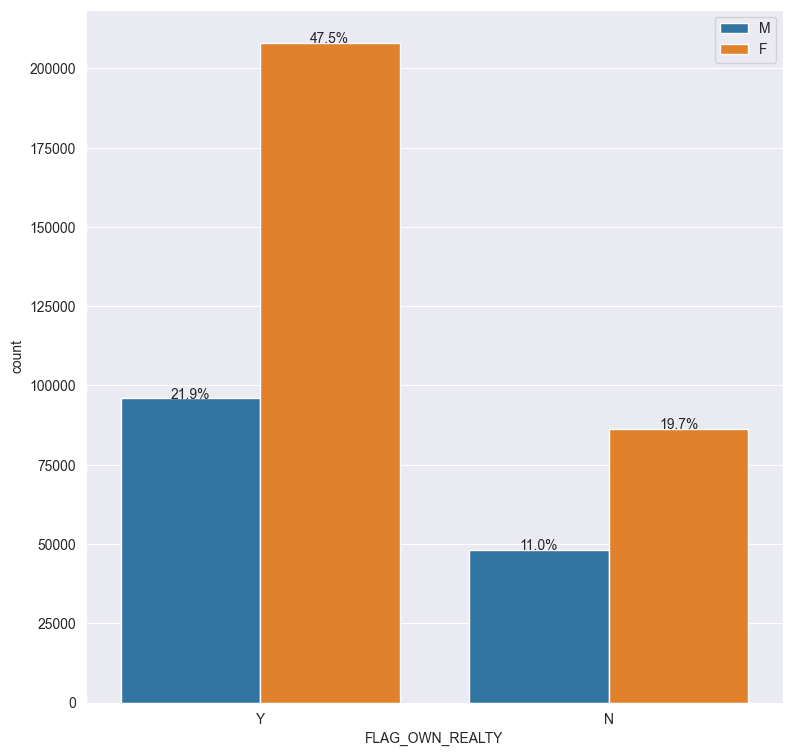

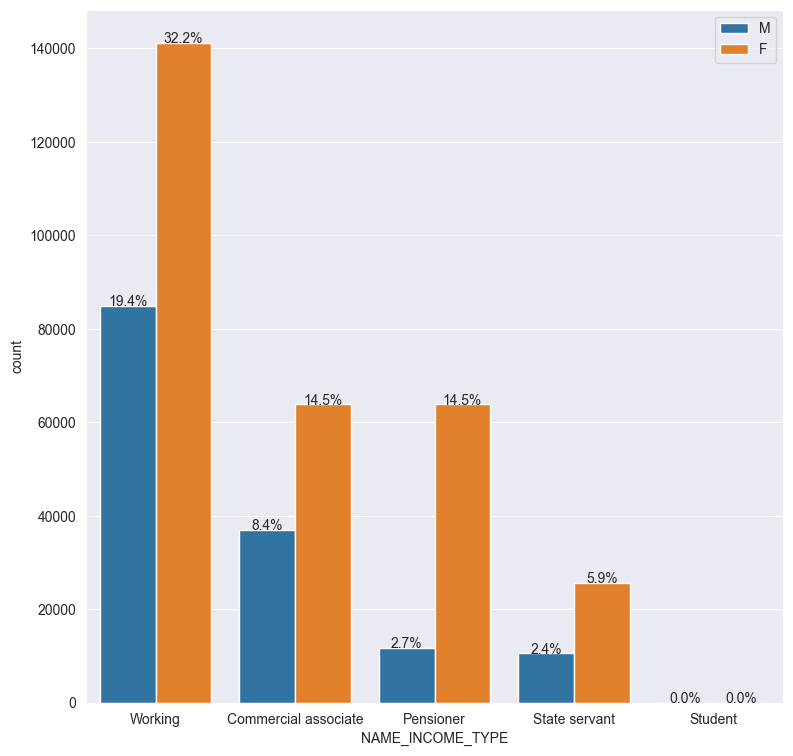

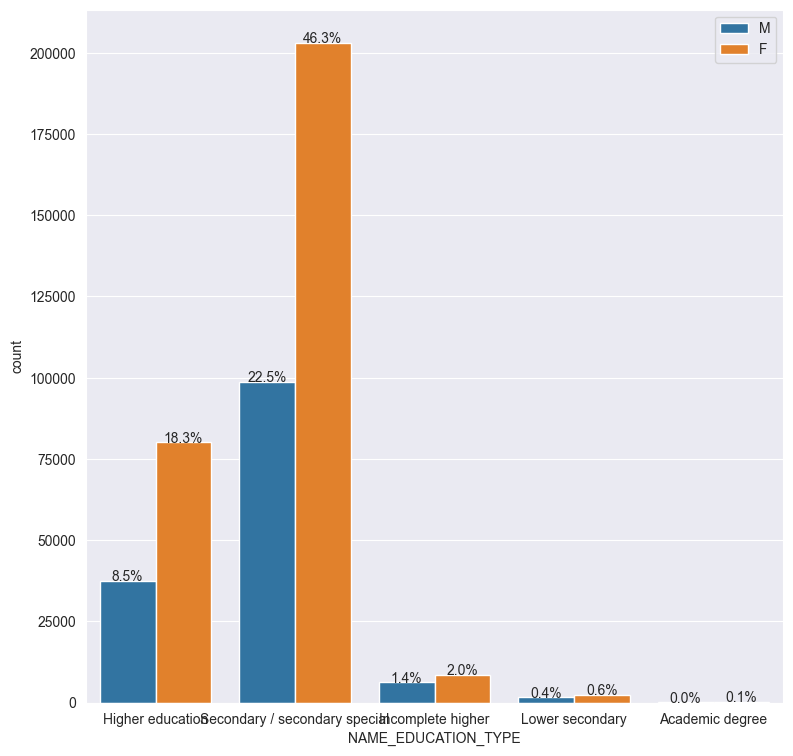

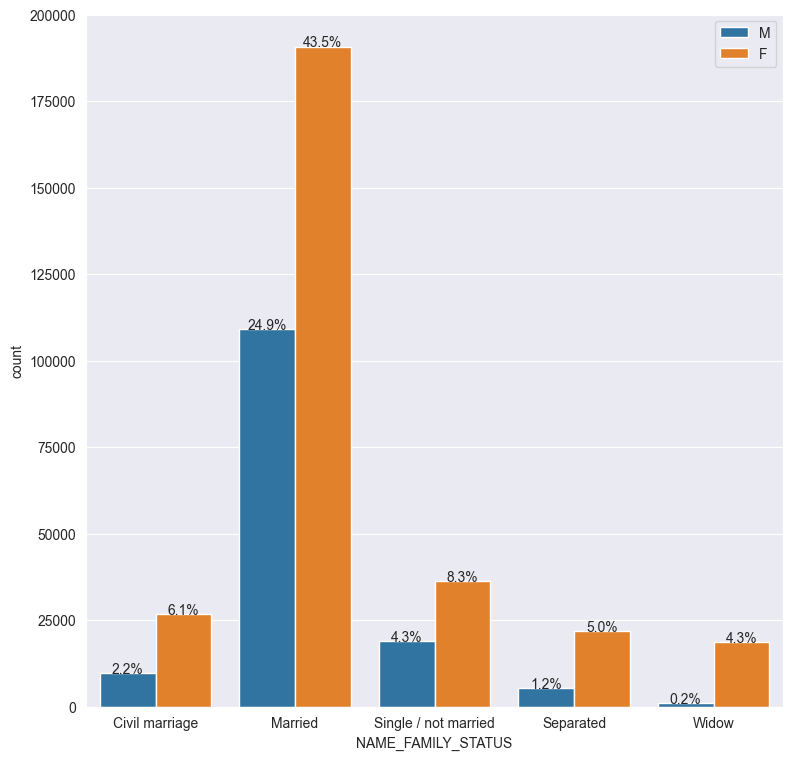

In [9]:
countplot_applicants(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS'])

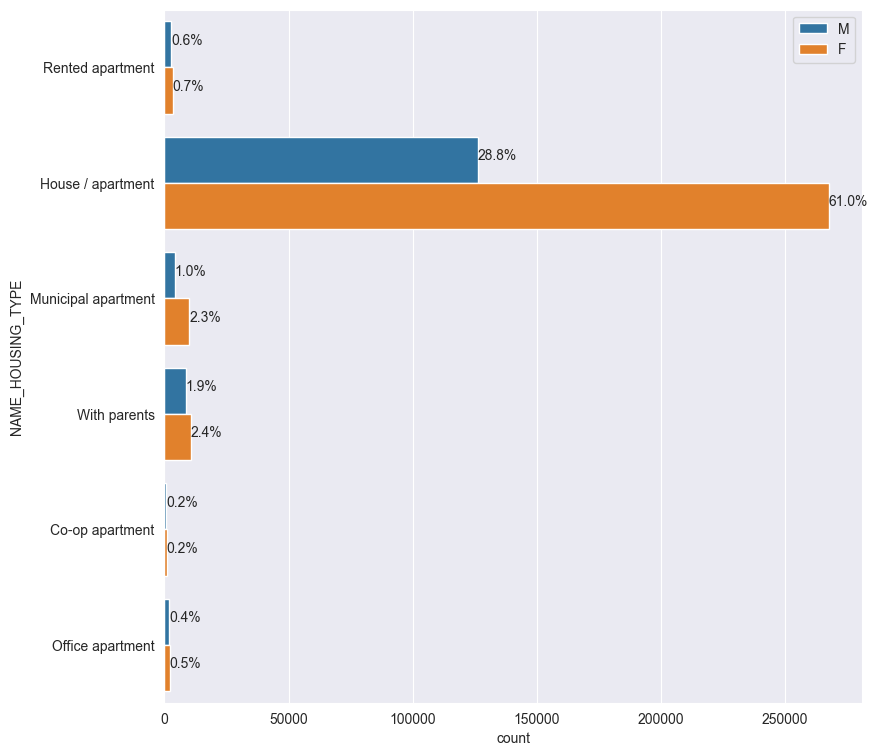

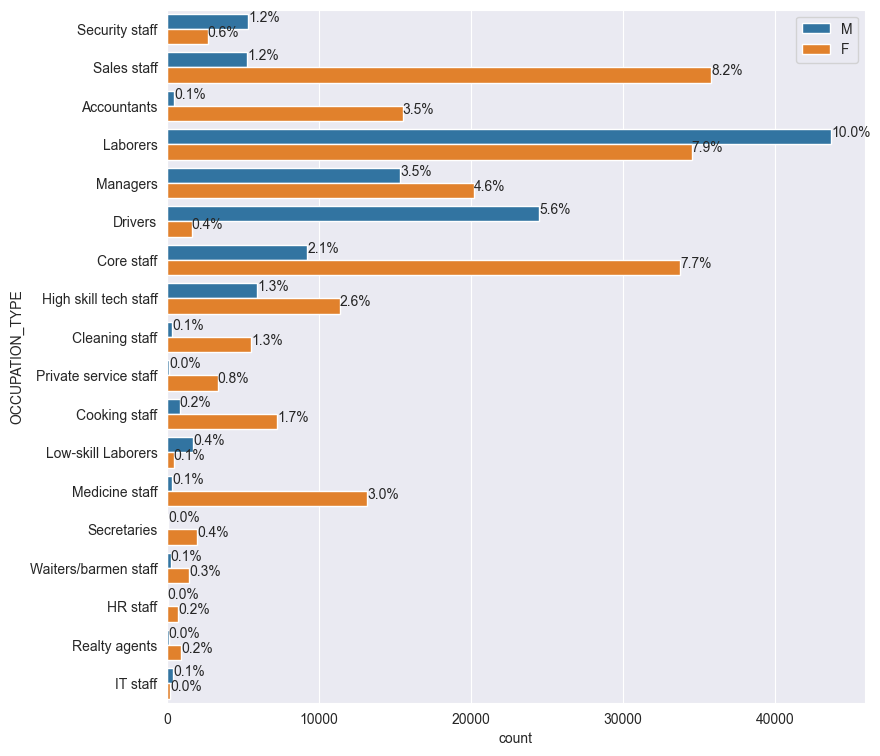

In [10]:
countplot_applicants2(['NAME_HOUSING_TYPE', 'OCCUPATION_TYPE'])

# Выводы из анализа: df_application_record
1. 36,9% заявок от мужчин и 67,1% заявок от женщин
2. Машину имеют 20,1% заявителей-мужчин и 17,1% женщина-заявитель.
3. 12,8% заявителей-мужчин и 50% женщина-заявитель не имеют автомобиля.
4. 21,9% заявителей-мужчин и 47,5% женщина-заявитель имеют недвижимость.
5. Собственности не имеют 11% женщина-заявитель и 19,7% абитуриентов-женщин.
6. Работают 19,4% заявителей-мужчин и 32,2% женщина-заявитель.
7. 8,4% заявителей-мужчин и 14,5% женщина-заявитель являются коммерческими партнерами.
8. 2,7% заявителей-мужчин и 14,5% женщина-заявитель являются пенсионерами.
9. 2,4% заявителей-мужчин и 5,9% женщина-заявитель являются государственными служащими.
10. Высшее образование имеют 8,5% заявителей-мужчин и 18,3% женщина-заявитель.
11. Закончили среднее образование 22,5% заявителей-мужчин и 46,3% женщина-заявитель.
12. Не закончили высшее образование 1,4% заявителей-мужчин и 2% женщина-заявитель.
13. 0,4% заявителей-мужчин и 0,6% женщина-заявитель не закончили среднее образование.
14. 0% заявителей-мужчин и 0,1% женщина-заявитель имеют ученую степень.
15. 2,2% заявителей-мужчин и 6,1% женщина-заявитель состояли в гражданском браке.
16. 24,9% заявителей-мужчин и 43,5% женщина-заявитель состоят в браке.
17. 4,3% заявителей-мужчин и 8,3% женщина-заявитель одиноки.
18. 1,2% заявителей-мужчин и 5% женщина-заявитель разделены.
19. 0,2% заявителей-мужчин и 4,3% женщина-заявитель вдовы.
20. В съемной квартире проживают 0,6% заявителей-мужчин и 0,7% женщина-заявитель.
21. В квартире проживают 28,8% заявителей-мужчин и 61,0% женщина-заявитель.
22. В съемной квартире проживают 0,6% заявителей-мужчин и 0,7% женщина-заявитель.
23. В муниципальной квартире проживает 1% заявителей-мужчин и 2,3% женщина-заявитель.
24. 1,9% заявителей-мужчин и 2,4% женщина-заявитель живут с родителями.
25. 0,4% заявителей-мужчин и 0,5% женщина-заявитель живут в служебный домах
26. Сведения о роде занятий:
    1. сотрудники службы безопасности: мужчины-1,2% и женщины-0,6%
    2. торговый персонал: мужчины-1,2% и женщины-8,2%
    3. бухгалтер: мужчина-0,1% и женщина-3,5%
    4. рабочие: мужчины-10% и женщины-7,9%
    5. менеджеры: мужчины-3,5% и женщины-4,6%
    6. водители: мужчины-5,6% и женщины-0,4%
    7. основной персонал: мужчины-2,1% и женщины-7,7%
    8. высококвалифицированный технический персонал: мужчины-1,3% и женщины-2,6%
    9. уборщики: мужчины-0,1% и женщины-1,3%
    10. частный обслуживающий персонал: мужчины-0% и женщины-0,8%
    11. кулинарный персонал: мужчины-0,2% и женщины-1,7%
    12. низкоквалифицированные рабочие: мужчины-0,4% и женщины-0,1%
    13. медицинский персонал: мужчины-0,1% и женщины-3%
    14. секретная: мужчины-0% и женщины-0,4%
    15. официанты/бармены: мужчины-0,1% и женщины-0,3%
    16. кадровый персонал: мужчины-0% и женщины-0,2%
    17. кадровый персонал: мужчины-0% и женщины-0,2%
    18. IT-персонал: мужчины-0,1% и женщины-0%


# График подсчета категориальных признаков: df_credit_record

In [11]:
def countplot_credit(features):
    for feature in features:
        plt.figure(figsize=(9, 9))
        ax=sns.countplot(x=df_credit_record[feature], data=df_credit_record)
        plt.legend(loc='best')
        total = len(df_credit_record[feature])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/total)
            x = p.get_x()+p.get_width()/2
            y = p.get_height()
            ax.annotate(percentage, (x,y), ha='center')
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


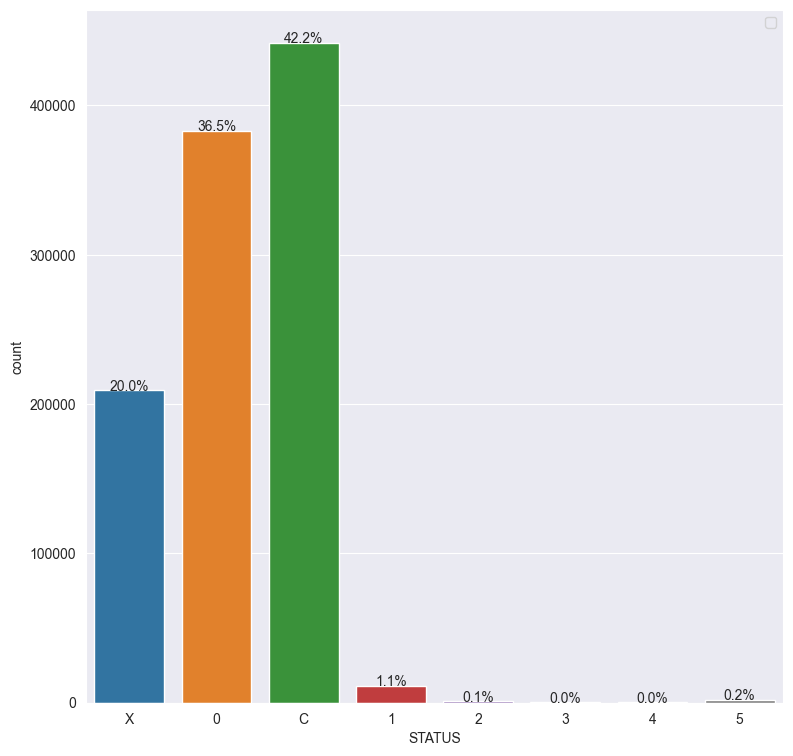

In [12]:
countplot_credit(['STATUS'])

# Выводы из анализа: df_credit_record
C: кредит за этот месяц уже выплачен X: кредита в этом месяце нет 0: кредит просрочен на 1-29 дней 1: кредит просрочен на 30-59 дней 2: кредит просрочен на 60-89 дней 3: кредит просрочен на 90-119 дней просрочки 4: кредит просрочен от 120 до 149 дней 5: кредит просрочен более чем на 150 дней.

a. 20% заявителей не имеют кредита в текущем месяце. b. 36,5% заявителей имеют просрочку от 1 до 29 дней. c. 42,2% заявителей уже выплатили кредит в текущем месяце. d. 1,1% заявителей имеют просрочку на 30-59 дней. e. 0,1% заявителей имеют просрочку на 60-89 дней. f. 0% заявителей имеют просрочку на 90-119 дней. g. 0% заявителей имеют просрочку на 120-149 дней. h 0,2% заявителей просрочили на 150 дней.



# Feature Engineering
### Finding Missing Values: df_application_record

In [13]:
# Проверяем есть ли в столбиках пустые элементы (параметры после NAME_HOUSING_TYPE уберём позже)
df_application_record.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

В dataFrame df_application_record отсутствует 134203 профессии. Мы не можем удалить эти метки, вместо этого я попытаюсь заполнить сведения о роде занятий на основе выводов из графа категориальных признаков. Мы обнаружили, что большинство вакансий для заявитель-мужчин: рабочие и водители, большинство вакансий для заявитель-женщин: торговый персонал и рабочие

### График профессии относительно образования : df_application_record


In [14]:
def countplot_occupation(features):
    for feature in features:
        plt.figure(figsize=(19, 19))
        ax=sns.countplot(y=df_application_record[feature], hue='NAME_EDUCATION_TYPE' , data=df_application_record)
        plt.legend(loc='best')
        total = len(df_application_record[feature])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
    plt.show()

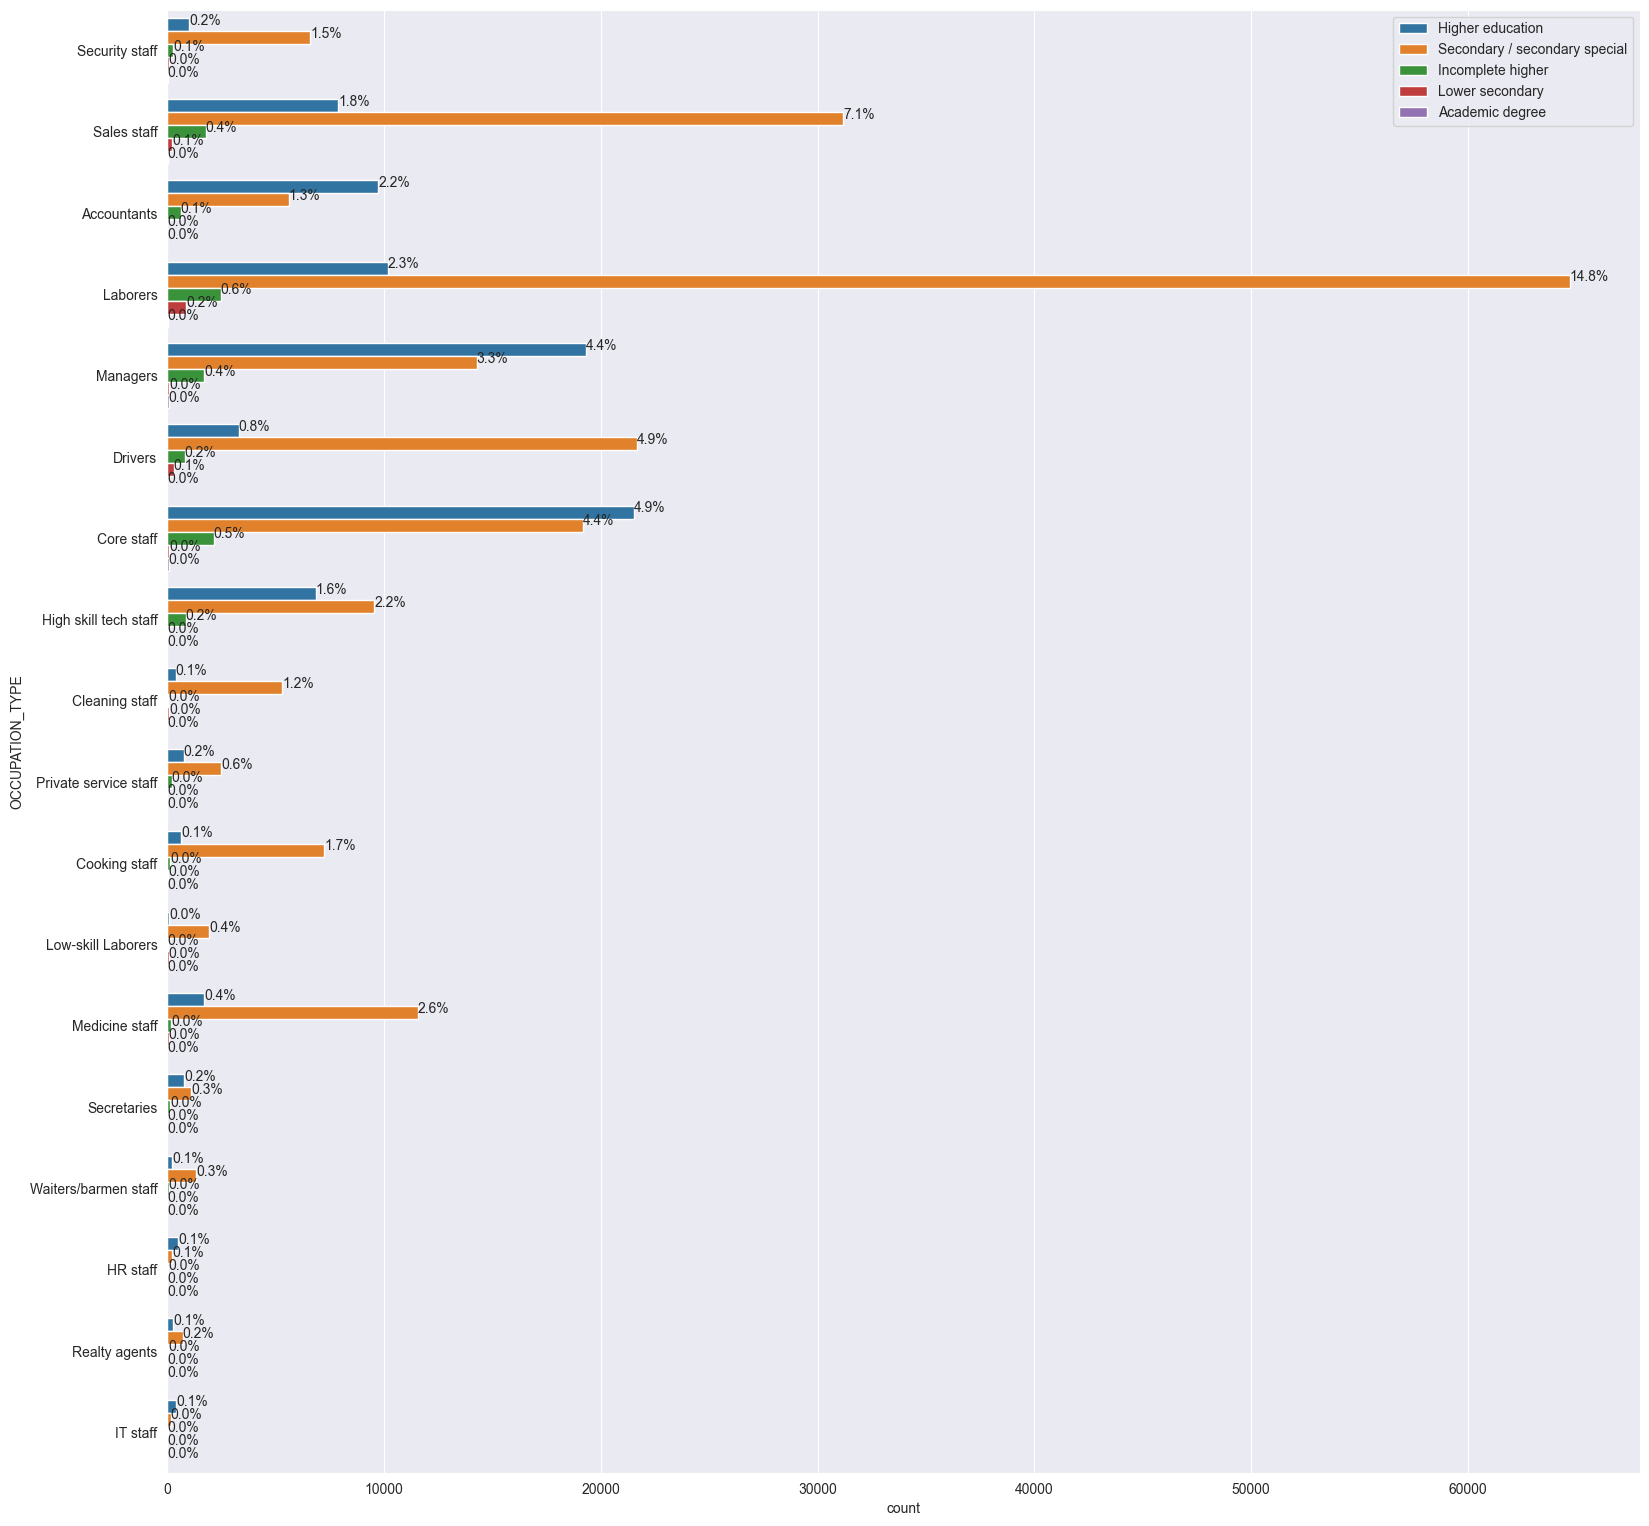

In [15]:
countplot_occupation(['OCCUPATION_TYPE'])

In [16]:
def occupation_by_education_by_gender(occupations, educations, genders, length):
    Gender = []
    Education = []
    Occupation = []
    Percentage = []
    for gender in genders:
        for education in educations:
            for occupation in occupations:
                Gender.append(gender)
                Education.append(education)
                Occupation.append(occupation)
                temp_df_1=df_application_record.loc[df_application_record['OCCUPATION_TYPE'] == occupation]
                temp_df_2=temp_df_1.loc[temp_df_1['CODE_GENDER'] == gender]
                temp_df_3=temp_df_2.loc[temp_df_2['NAME_EDUCATION_TYPE'] == education]
                length_filter = len(temp_df_3)
                Percentage.append(length_filter/length)
    percent_dict={
        'Gender': Gender,
        'Education': Education,
        'Occupation': Occupation,
        'Popularity Percentage': Percentage
    }
    df = pd.DataFrame(percent_dict)
    df.to_excel('Occupation_popularity_index.xlsx', index=False)

In [17]:
occupation_by_education_by_gender(list(df_application_record['OCCUPATION_TYPE'].unique()), list(df_application_record['NAME_EDUCATION_TYPE'].unique()), list(df_application_record['CODE_GENDER'].unique()), len(df_application_record))

In [18]:
occupation_popularity = pd.read_excel('Occupation_popularity_index.xlsx')

### Заменим пустые поля в "OCCUPATION_TYPE" на наиболее популярные профессии

In [19]:
occupation_popularity['Tag'] = occupation_popularity['Gender']+'_'+occupation_popularity['Education']

Создание словаря «Тег» и «популярность»

In [20]:
def Dict(data):
    tag_list=list(data['Tag'].unique())
    popular_occupation = []
    data_grouped = data.groupby('Tag')
    for tag in tag_list:
        grouped_data = data_grouped.get_group(tag)
        popular_occupation.append(grouped_data.loc[grouped_data['Popularity Percentage'] == max(list(grouped_data['Popularity Percentage']))]['Occupation'].tolist()[0])
    Tag_dict={
        'Tag': tag_list,
        'Occupation': popular_occupation
    }
    return Tag_dict

In [21]:
dict_df = Dict(occupation_popularity)

In [22]:
pd.DataFrame(dict_df).to_excel('Tag_vs_Occupation.xlsx', index= False)

In [23]:
tag_data = pd.read_excel('Tag_vs_Occupation.xlsx')

In [24]:
tag_data

,Tag,Occupation
0,M_Higher education,Managers
1,M_Secondary / secondary special,Laborers
2,M_Incomplete higher,Laborers
3,M_Lower secondary,Laborers
4,M_Academic degree,Core staff
5,F_Higher education,Core staff
6,F_Secondary / secondary special,Laborers
7,F_Incomplete higher,Core staff
8,F_Lower secondary,Laborers
9,F_Academic degree,Managers


In [25]:
tag_g=list(tag_data['Tag'])
occu_g = list(tag_data['Occupation'])
tag_dict = {}
for index in range(len(tag_g)):
    tag_dict[tag_g[index]] = occu_g[index]

In [26]:
tag_dict

{'M_Higher education': 'Managers',
 'M_Secondary / secondary special': 'Laborers',
 'M_Incomplete higher': 'Laborers',
 'M_Lower secondary': 'Laborers',
 'M_Academic degree': 'Core staff',
 'F_Higher education': 'Core staff',
 'F_Secondary / secondary special': 'Laborers',
 'F_Incomplete higher': 'Core staff',
 'F_Lower secondary': 'Laborers',
 'F_Academic degree': 'Managers'}

In [27]:
df_application_record['Tag'] = df_application_record['CODE_GENDER']+'_'+df_application_record['NAME_EDUCATION_TYPE']

In [28]:
def Replace_nan_occupation(df):
    for key in tag_dict:
        if df['Tag'] == key and pd.isnull(df['OCCUPATION_TYPE']):
            df['OCCUPATION_TYPE'] = tag_dict[key]
    return df

In [29]:
len(df_application_record)

438557

In [30]:
df_application_record =df_application_record.apply(Replace_nan_occupation, axis=1)

In [31]:
df_application_record.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
Tag                    0
dtype: int64

# Преобразование функций формата Days в читаемый формат

In [32]:
df_application_record['AGE'] = np.ceil(pd.to_timedelta(df_application_record['DAYS_BIRTH'], unit='D').dt.days / -365.25)

In [33]:
df_application_record['AGE']

0         33.0
1         33.0
2         59.0
3         53.0
4         53.0
          ... 
438552    63.0
438553    44.0
438554    23.0
438555    60.0
438556    52.0
Name: AGE, Length: 438557, dtype: float64

In [34]:
# Создаём колонку возраст
df_application_record.drop('DAYS_BIRTH', axis=1, inplace=True)

In [35]:
df_application_record.loc[(df_application_record['DAYS_EMPLOYED'] > 0), 'DAYS_EMPLOYED'] = 0
df_application_record['YEARS_EMPLOYED'] = np.ceil(pd.to_timedelta(df_application_record['DAYS_EMPLOYED'], unit='D').dt.days / -365.25)

In [36]:
print(df_application_record['YEARS_EMPLOYED'])

0         13.0
1         13.0
2          4.0
3          9.0
4          9.0
          ... 
438552    -0.0
438553     9.0
438554     2.0
438555    -0.0
438556     4.0
Name: YEARS_EMPLOYED, Length: 438557, dtype: float64


In [37]:
df_application_record.drop(['DAYS_EMPLOYED', 'Tag'], axis=1, inplace=True)

### Финальные колонки

In [38]:
df_application_record.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'AGE', 'YEARS_EMPLOYED'],
      dtype='object')

# Кодирование категориальных признаков в числовые значения

### Данные df_application_record

In [39]:
def Cat_to_Num(features):
    for feature in features:
        feature_list = list(np.unique(df_application_record[feature]))
        feature_dict = {}
        for i in range(len(feature_list)):
            feature_dict[feature_list[i]] = i
        df_application_record.replace({feature : feature_dict}, inplace=True)
        print(feature, '-->', feature_dict)

In [40]:
categorical_features = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE', 'NAME_HOUSING_TYPE', 'NAME_EDUCATION_TYPE']
Cat_to_Num(categorical_features)

CODE_GENDER --> {'F': 0, 'M': 1}
FLAG_OWN_CAR --> {'N': 0, 'Y': 1}
FLAG_OWN_REALTY --> {'N': 0, 'Y': 1}
NAME_INCOME_TYPE --> {'Commercial associate': 0, 'Pensioner': 1, 'State servant': 2, 'Student': 3, 'Working': 4}
NAME_FAMILY_STATUS --> {'Civil marriage': 0, 'Married': 1, 'Separated': 2, 'Single / not married': 3, 'Widow': 4}
OCCUPATION_TYPE --> {'Accountants': 0, 'Cleaning staff': 1, 'Cooking staff': 2, 'Core staff': 3, 'Drivers': 4, 'HR staff': 5, 'High skill tech staff': 6, 'IT staff': 7, 'Laborers': 8, 'Low-skill Laborers': 9, 'Managers': 10, 'Medicine staff': 11, 'Private service staff': 12, 'Realty agents': 13, 'Sales staff': 14, 'Secretaries': 15, 'Security staff': 16, 'Waiters/barmen staff': 17}
NAME_HOUSING_TYPE --> {'Co-op apartment': 0, 'House / apartment': 1, 'Municipal apartment': 2, 'Office apartment': 3, 'Rented apartment': 4, 'With parents': 5}
NAME_EDUCATION_TYPE --> {'Academic degree': 0, 'Higher education': 1, 'Incomplete higher': 2, 'Lower secondary': 3, 'Seconda

df_application_record.head(10)


# Credit_record data

In [41]:
convert_to = {'C' : 'Good_Debt', 'X' : 'Good_Debt', '0' : 'Good_Debt', '1' : 'Neutral_Debt', '2' : 'Neutral_Debt', '3' : 'Bad_Debt', '4' : 'Bad_Debt', '5' : 'Bad_Debt'}
df_credit_record.replace({'STATUS' : convert_to}, inplace=True)

In [42]:
df_credit_record

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,Good_Debt
1,5001711,-1,Good_Debt
2,5001711,-2,Good_Debt
3,5001711,-3,Good_Debt
4,5001712,0,Good_Debt
...,...,...,...
1048570,5150487,-25,Good_Debt
1048571,5150487,-26,Good_Debt
1048572,5150487,-27,Good_Debt
1048573,5150487,-28,Good_Debt


### Подсчет количества долгов

In [43]:
df_credit_record = df_credit_record.value_counts(subset=['ID', 'STATUS']).unstack(fill_value=0)

In [44]:
df_credit_record

STATUS,Bad_Debt,Good_Debt,Neutral_Debt
ID,,,
5001711,0,4,0
5001712,0,19,0
5001713,0,22,0
5001714,0,15,0
5001715,0,60,0
...,...,...,...
5150482,0,18,0
5150483,0,18,0
5150484,0,13,0


### Создание статуса одобрения кредита

In [45]:
df_credit_record.loc[(df_credit_record['Good_Debt'] > df_credit_record['Neutral_Debt']), 'CREDIT_APPROVAL_STATUS'] = 1
df_credit_record.loc[(df_credit_record['Good_Debt'] > df_credit_record['Bad_Debt']), 'CREDIT_APPROVAL_STATUS'] = 1
df_credit_record.loc[(df_credit_record['Neutral_Debt'] > df_credit_record['Good_Debt']), 'CREDIT_APPROVAL_STATUS'] = 0
df_credit_record.loc[(df_credit_record['Bad_Debt'] > df_credit_record['Good_Debt']), 'CREDIT_APPROVAL_STATUS'] = 0
df_credit_record.loc[(df_credit_record['Bad_Debt'] > df_credit_record['Neutral_Debt']), 'CREDIT_APPROVAL_STATUS'] = 0

In [46]:
print(df_credit_record)

STATUS   Bad_Debt  Good_Debt  Neutral_Debt  CREDIT_APPROVAL_STATUS
ID                                                                
5001711         0          4             0                     1.0
5001712         0         19             0                     1.0
5001713         0         22             0                     1.0
5001714         0         15             0                     1.0
5001715         0         60             0                     1.0
...           ...        ...           ...                     ...
5150482         0         18             0                     1.0
5150483         0         18             0                     1.0
5150484         0         13             0                     1.0
5150485         0          2             0                     1.0
5150487         0         30             0                     1.0

[45985 rows x 4 columns]


In [47]:
np.unique(df_credit_record['CREDIT_APPROVAL_STATUS'])

array([0., 1.])

In [48]:
df_credit_record['CREDIT_APPROVAL_STATUS'] = df_credit_record['CREDIT_APPROVAL_STATUS'].astype('int')

In [49]:
df_credit_record

STATUS,Bad_Debt,Good_Debt,Neutral_Debt,CREDIT_APPROVAL_STATUS
ID,,,,
5001711,0,4,0,1
5001712,0,19,0,1
5001713,0,22,0,1
5001714,0,15,0,1
5001715,0,60,0,1
...,...,...,...,...
5150482,0,18,0,1
5150483,0,18,0,1
5150484,0,13,0,1


In [50]:
df_credit_record.drop(['Bad_Debt', 'Good_Debt', 'Neutral_Debt'], axis=1, inplace=True)

In [51]:
df_credit_record

STATUS,CREDIT_APPROVAL_STATUS
ID,
5001711,1
5001712,1
5001713,1
5001714,1
5001715,1
...,...
5150482,1
5150483,1
5150484,1


### Объединение данных df_application_record и df_credit_record

In [52]:
Final_Credit_data = df_application_record.merge(df_credit_record, how='inner', on=['ID'])

In [53]:
Final_Credit_data.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED,CREDIT_APPROVAL_STATUS
0,5008804,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,10,2.0,33.0,13.0,1
1,5008805,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,10,2.0,33.0,13.0,1
2,5008806,1,1,1,0,112500.0,4,4,1,1,1,0,0,0,16,2.0,59.0,4.0,1
3,5008808,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,53.0,9.0,1
4,5008809,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,53.0,9.0,1
5,5008810,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,53.0,9.0,1
6,5008811,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,53.0,9.0,1
7,5008812,0,0,1,0,283500.0,1,1,2,1,1,0,0,0,3,1.0,62.0,-0.0,1
8,5008813,0,0,1,0,283500.0,1,1,2,1,1,0,0,0,3,1.0,62.0,-0.0,1
9,5008814,0,0,1,0,283500.0,1,1,2,1,1,0,0,0,3,1.0,62.0,-0.0,1


In [54]:
credit_approval_data = Final_Credit_data.drop('ID', axis=1, inplace=False)

In [55]:
credit_approval_data

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED,CREDIT_APPROVAL_STATUS
0,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,10,2.0,33.0,13.0,1
1,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,10,2.0,33.0,13.0,1
2,1,1,1,0,112500.0,4,4,1,1,1,0,0,0,16,2.0,59.0,4.0,1
3,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,53.0,9.0,1
4,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,53.0,9.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,1,1,1,0,315000.0,4,4,1,1,1,0,0,0,10,2.0,48.0,7.0,0
36453,0,0,1,0,157500.0,0,1,1,1,1,0,1,1,11,2.0,34.0,4.0,0
36454,0,0,1,0,157500.0,1,1,1,1,1,0,1,1,11,2.0,34.0,4.0,1
36455,0,0,1,0,283500.0,4,4,1,1,1,0,0,0,14,2.0,50.0,2.0,1


In [56]:
credit_approval_data.describe().T

,count,mean,std,min,25%,50%,75%,max
CODE_GENDER,36457.0,0.329895,0.470181,0.0,0.0,0.0,1.0,1.0
FLAG_OWN_CAR,36457.0,0.379708,0.485321,0.0,0.0,0.0,1.0,1.0
FLAG_OWN_REALTY,36457.0,0.672189,0.469422,0.0,0.0,1.0,1.0,1.0
CNT_CHILDREN,36457.0,0.430315,0.742367,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,36457.0,186685.736662,101789.226482,27000.0,121500.0,157500.0,225000.0,1575000.0
NAME_INCOME_TYPE,36457.0,2.398195,1.734032,0.0,1.0,4.0,4.0,4.0
NAME_EDUCATION_TYPE,36457.0,3.097183,1.341292,0.0,1.0,4.0,4.0,4.0
NAME_FAMILY_STATUS,36457.0,1.367885,0.954557,0.0,1.0,1.0,1.0,4.0
NAME_HOUSING_TYPE,36457.0,1.282881,0.951675,0.0,1.0,1.0,1.0,5.0
FLAG_MOBIL,36457.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


### Разделение credit_approval_data на наборы для обучения и тестирования

In [57]:
X = credit_approval_data.drop('CREDIT_APPROVAL_STATUS', axis=1)
y = credit_approval_data['CREDIT_APPROVAL_STATUS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Baseline

In [58]:
from sklearn.metrics import accuracy_score
lr = LinearRegression()
#y_train = y_train.reshape(-1,1)
# print(X_train.shape, y_train.shape)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_score = lr.predict(X_test.iloc[:,1])

D:\PyCharm Community Edition 2022.3.2\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0 1 1 ... 0 0 1].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
print('roc-auc', roc_auc_score(y_test,y_score))
print('precision:', precision_score(y_test,y_pred))
print('recall:', recall_score(y_test,y_pred))
print('f1:', f1_score (y_test,y_pred))
print('logloss:', log_loss(y_test,y_pred))

In [ ]:
metrics = pd.DataFrame(
    index=['roc-auc','precision', 'recall', 'f1', 'logloss'])

metrics['Baseline_LR'] =[roc_auc_score(y_test,y_score),
                         precision_score(y_test,y_score),
                         recall_score(y_test,y_score),
                         f1_score(y_test,y_score),
                         log_loss(y_test,y_score)]
print(metrics)

In [ ]:
from sklearn.metrics import auc, roc_curve

fpr, tpr, thresholds =roc_curve(y_test,y_score)

roc_auc = auc(fpr,tpr)

plt.plot(fpr,tpr, color = 'darkorange', label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], color = 'navy', lw=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0],[1.05])

plt.xlabe('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Logistic Regression Roc AUC = 0.3f' % roc_auc) 
plt.legend(loc="lower right")
plt.show()

### Accuracy Score